In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import dstn, idstn, fftshift, ifftshift, fft2, ifft2

from classicalfield import FiniteTempGPE as gpe 

## Let's figure out how to implement DST starting from 1 dimension

First, let's do this with the built in scipy function

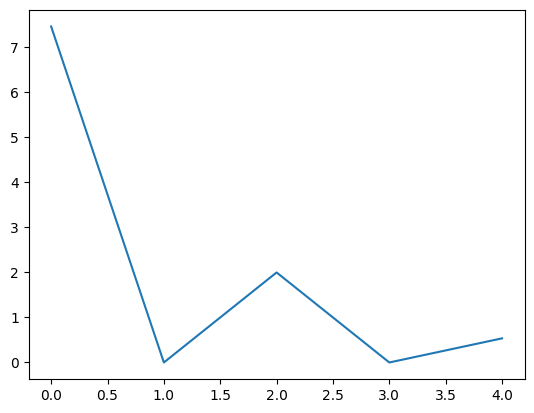

In [2]:
arr_1d = np.ones(5) 

dst1d_result = dstn(arr_1d, type = 1)

plt.figure() 
plt.plot((dst1d_result)) 

In [3]:
print(dst1d_result)

[ 7.46410162 -0.          2.         -0.          0.53589838]


In [4]:
print(2*(np.sin(np.pi/6) + np.sin(2*np.pi/6) + np.sin(3*np.pi/6) + np.sin(4*np.pi/6) + np.sin(5*np.pi/6)))

7.464101615137754


Manual implementation

In [5]:
arrk_1d_man = np.array([12,8.26, 1.8, 0.9, 0.35, 0, 0,0,0]) 
x = np.arange(0,11)

In [6]:
def dst(x): 
    N = len(arrk_1d_man)
    s = 0
    for k in range(0,N): 
        #print()
        s+= arrk_1d_man[k]*np.sin(np.pi*(k+1)*x/(N+1))

    return s


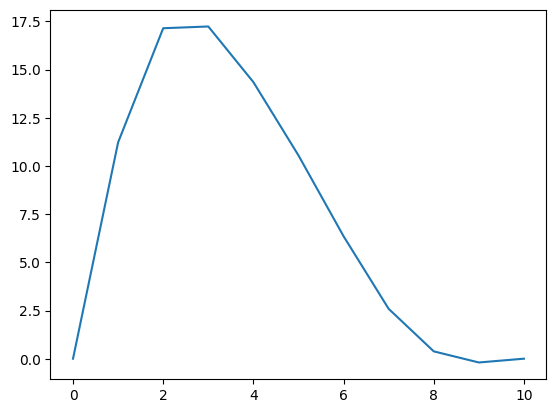

In [7]:
plt.plot(x, dst(x)) 

In [8]:
g = gpe(Nsamples = 1, numRealSteps=1)

No vortices to be spawned
Total Imag Time:  55.06800079345703
shape:  (1024, 1024)
(1024, 1024)
(1024, 1024)


In [9]:
karr = g.genPsiK()[0] 

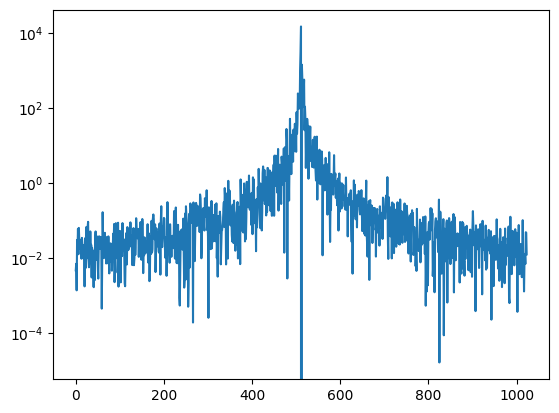

In [26]:
plt.figure() 
plt.plot(fftshift(np.abs(karr)**2))
# plt.xscale('log')
plt.yscale('log')

In [28]:
def dst_gpe(x, karr): 
    N = len(karr)
    s = 0
    for k in range(0,N): 
        #print()
        s+= karr[k]*np.sin(np.pi*(k+1)*x/(N+1))

    return s

In [39]:
dst_result = dst_gpe(np.arange(0, len(karr)+1), karr) 

In [37]:
print(g.xi[0][0])

[-50.         -49.90234375 -49.8046875  ...  49.70703125  49.8046875
  49.90234375]


In [52]:
print(karr)

[  0.          +0.j         -37.16244227  -6.38621136j
  -1.31843987 -24.33838757j ...  15.23551896 -27.60719783j
  40.52612361 +36.69416007j -69.20643043-100.34084771j]


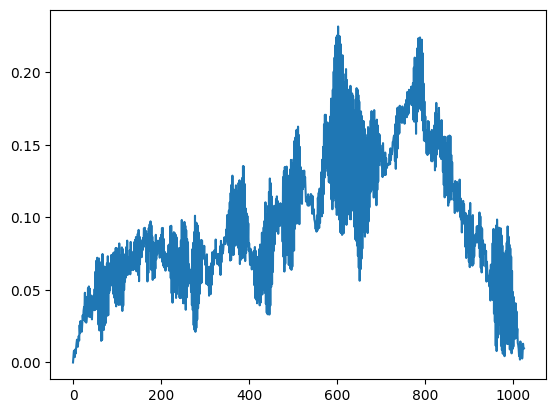

In [53]:
plt.plot(np.arange(0, len(karr)+1), np.abs(dst_result)/(len(karr)+1)) 


Moving to higher dimensions

In [58]:
axes = [] 
for i in range(2): 

    axes.append(np.linspace(0, g.winL, g.npoints)) 
    
axes_arr = np.array(axes) 
xi = np.meshgrid(*axes_arr)

In [76]:
karr_2d = g.genPsiK() 

axis0_dst = np.apply_along_axis(dst_gpe, axis = 0, arr = xi[0], karr = fftshift(karr_2d)) 

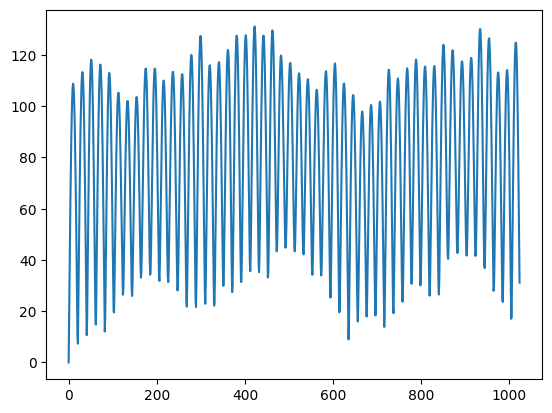

In [77]:
plt.figure() 
plt.plot(np.abs(axis0_dst)[len(axis0_dst)//2])

#plt.colorbar() 

In [78]:
axis0_dst = np.apply_along_axis(dst_gpe, axis = 1, arr = xi[1], karr = axis0_dst) 

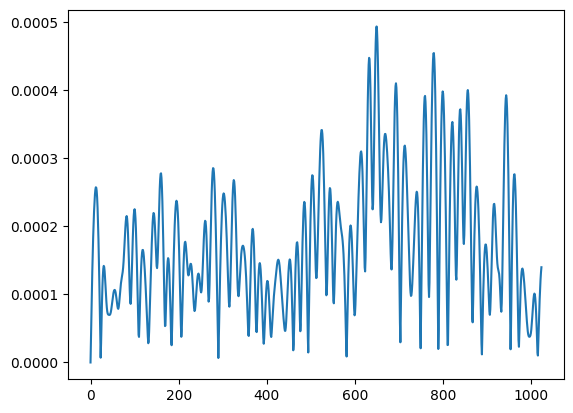

In [82]:
plt.figure()
plt.plot(np.abs(axis0_dst)[len(axis0_dst)//2]/(len(karr))**2)
#plt.colorbar() 

In [ ]:
### investigate the behavior at the edge of the box - likely not going to zero because it is a complex input so check this by using a real input as the momentum input 